# VR Literature Search: Journals
This notebook is for visualizing XR topics in AGU journals based on a Scopus search. 

## Step 1: Scopus Query
Here's the Scopus query I ran: `( TITLE-ABS-KEY ( "virtual reality" ) OR TITLE-ABS-KEY ( "augmented reality" ) OR TITLE-ABS-KEY ( "virtual environment" ) OR TITLE-ABS-KEY ( "spatial computing" ) OR TITLE-ABS-KEY ( "extended reality" ) AND DOI ( 10.1029/* ) )`

## Read bibliography into pandas dataframe
I saved the results to a .bib file. We can use this cell to read it into a pandas dataframe for our plots.

In [12]:
import pandas as pd
import bibtexparser

# Read the .bib file
with open('scopus-agu-journals.bib', 'r') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)
# Convert to DataFrame
df = pd.DataFrame(bib_database.entries)
# Data handling:
df['Year'] = pd.to_numeric(df['year']) # Cast to numeric 
print(df.shape)
df.columns

(25, 25)


Index(['note', 'source', 'publication_stage', 'type', 'language', 'coden',
       'issn', 'publisher', 'keywords', 'author_keywords', 'abstract',
       'affiliations', 'url', 'doi', 'pages', 'number', 'volume', 'journal',
       'year', 'title', 'author', 'ENTRYTYPE', 'ID', 'isbn', 'Year'],
      dtype='object')

# Bar Chart Visualization
I'd like to have the abstract titles be included in the hypergram. Let's see if we can make that happen.

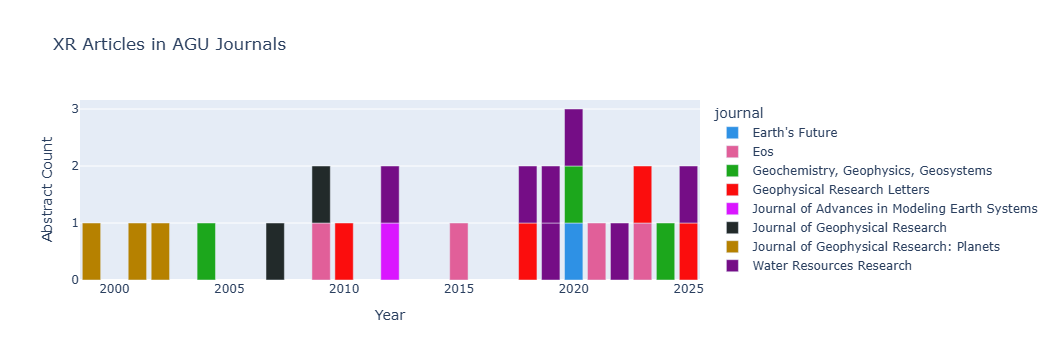

In [13]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


titlestring = "XR Articles in AGU Journals"

# Read the .bib file
with open('scopus-agu-journals.bib', 'r') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

# Convert to DataFrame
df = pd.DataFrame(bib_database.entries)

# Data handling:
df['Year'] = pd.to_numeric(df['year']) # Cast to numeric 
df['Abstract Count'] = 1 # for bar chart purposes
# Remove curly braces using str.replace()
df['title'] = df['title'].str.replace(r'[{}]', '', regex=True)
df['title'] = df['title'].str.replace(r'[/]', '', regex=True)
df['title'] = df['title'].str.replace(r'[\"]', '', regex=True)
df['author'] = df['author'].str.replace(r'[{}]', '', regex=True)
df['author'] = df['author'].str.replace(r'[~]', '', regex=True)

# Wrap the text and replace newlines with <br>
df['wrapped_author'] = df['author'].fillna('').str.wrap(50).apply(lambda x: x.replace('\n', '<br>'))
df["author"] = df["wrapped_author"]
df['wrapped_title'] = df['title'].fillna('').str.wrap(50).apply(lambda x: x.replace('\n', '<br>'))
df["title"] = df["wrapped_title"]

# Color code by journal:
df = df.sort_values(by='journal')
df.shape

fig = px.bar(df, x='Year', y = 'Abstract Count', color='journal',
            color_discrete_sequence=px.colors.qualitative.Dark24,
            title = titlestring,
            hover_name = "title",
            hover_data={"author": True, "doi": True, "Abstract Count": False})#"adsurl"})
# fig.data[-1].text = sums

fig.update_traces(textposition='inside')
fig.show()
fig.write_html("plots/"+titlestring +" Histogram_Labeled.html")